[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


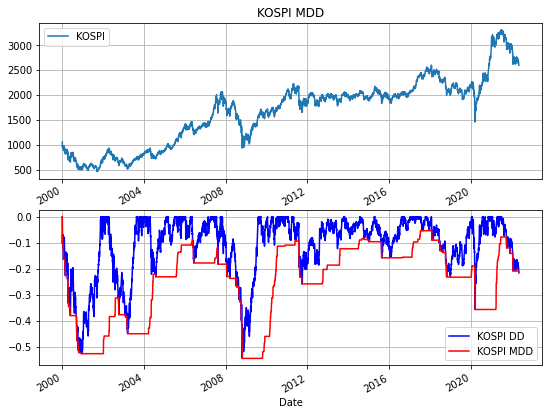

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt


pdr.get_data_yahoo('^KS11', '2000-01-01')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-01' )

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()
 
plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


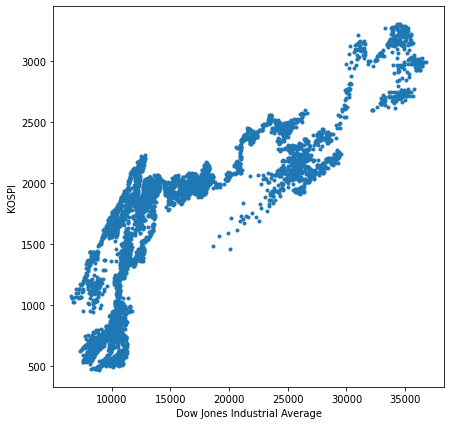

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
df. head()    

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,0.901228,0.918527,0.888393,0.917969,0.784880,163811200
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.854541,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.782495,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.793945,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.725238,767972800


In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
df. head()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802322,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480591,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676666,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,132.536865,96452100


In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
print(df. head(),df.tail())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1999-12-31  0.901228  0.918527  0.888393  0.917969   0.784880  163811200
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.854541  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.782494  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.793945  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.725238  767972800                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-23  132.160004  132.429993  130.779999  130.960007  129.801270   
2020-12-24  131.320007  133.460007  131.100006  131.970001  130.802353   
2020-12-28  133.990005  137.339996  133.509995  136.690002  135.480576   
2020-12-29  138.050003  138.789993  134.339996  134.869995  133.676682   
2020-12-30  135.580002  135.990005  133.39999

## 단순수익률과 로그수익률(AAPL)

In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_Close'}, inplace=True)
df['simple_rtn'] = df.adj_Close.pct_change()
df['log_rtn'] = np.log(df.adj_Close/df.adj_Close.shift(1))

In [7]:
print(df. head(),df.tail())

            adj_Close  simple_rtn   log_rtn
Date                                       
1999-12-31   0.784880         NaN       NaN
2000-01-03   0.854541    0.088754  0.085034
2000-01-04   0.782494   -0.084310 -0.088077
2000-01-05   0.793945    0.014633  0.014527
2000-01-06   0.725238   -0.086539 -0.090514              adj_Close  simple_rtn   log_rtn
Date                                        
2020-12-23  129.801285   -0.006976 -0.007001
2020-12-24  130.802322    0.007712  0.007682
2020-12-28  135.480576    0.035766  0.035141
2020-12-29  133.676666   -0.013315 -0.013404
2020-12-30  132.536850   -0.008527 -0.008563
